# Homework 2: Logistic Regression- Binary Classification and K-Fold Validation


Madhu Kiran Chiti - 801333676 - ECGR_5105

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings('ignore')

### Problem 1: logistic regression binary classifier for positive diabetes.


In [2]:
raw_df = pd.read_csv("Diabetes.csv")
raw_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
raw_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
def feature_scale(df_train, df_test, categories_X, category_Y, scaler):
    ''' '''
    #Training Setup
    df_norm_train = df_train

    df_norm_train[category_Y] = scaler.fit_transform(df_train[category_Y])
    df_norm_train[categories_X] = scaler.fit_transform(df_train[categories_X])

    Y_norm_train = df_norm_train[category_Y].to_numpy()

    m_norm_train = len(Y_norm_train)

    X_norm_train = df_norm_train[categories_X].to_numpy()
    X_norm_train = np.hstack((np.ones((m_norm_train,1)), X_norm_train))
    
    #Testing Setup
    df_norm_test = df_test

    df_norm_test[category_Y] = scaler.fit_transform(df_norm_test[category_Y])
    df_norm_test[categories_X] = scaler.fit_transform(df_norm_test[categories_X])

    Y_norm_test = df_norm_test[category_Y].to_numpy()

    m_norm_test = len(Y_norm_test)

    X_norm_test = df_norm_test[categories_X].to_numpy()
    X_norm_test = np.hstack((np.ones((m_norm_test,1)), X_norm_test))
    
    return X_norm_train, Y_norm_train, X_norm_test, Y_norm_test

In [5]:
category_Y = ['Outcome']
categories_X = raw_df.columns[:8]

scaler = MinMaxScaler()

In [6]:
df_train, df_test = train_test_split(raw_df, train_size = 0.8, test_size = 0.2)

In [7]:
X_train, Y_train, X_test, Y_test = feature_scale(df_train, df_test, categories_X, category_Y, scaler)

In [8]:
X_train

array([[1.        , 0.11764706, 0.44723618, ..., 0.56397306, 0.0890411 ,
        0.35      ],
       [1.        , 0.41176471, 0.68341709, ..., 0.43771044, 0.24101027,
        0.5       ],
       [1.        , 0.52941176, 0.60301508, ..., 0.35016835, 0.27782534,
        0.45      ],
       ...,
       [1.        , 0.        , 0.6281407 , ..., 0.41582492, 0.05222603,
        0.        ],
       [1.        , 0.05882353, 0.59296482, ..., 0.56060606, 0.07577055,
        0.03333333],
       [1.        , 0.11764706, 0.49748744, ..., 0.61616162, 0.15796233,
        0.        ]])

In [9]:
# Logistic Regression

lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [10]:
y_pred = lr_model.predict(X_test)

In [11]:
c_matrix = confusion_matrix(Y_test, y_pred)
print("1 Confusion Matrix:", c_matrix , "\n")

class_report = classification_report(Y_test, y_pred)
print(class_report)

1 Confusion Matrix: [[89 20]
 [18 27]] 

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       109
         1.0       0.57      0.60      0.59        45

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.76      0.75      0.75       154



Text(0.5, 427.9555555555555, 'Predictions')

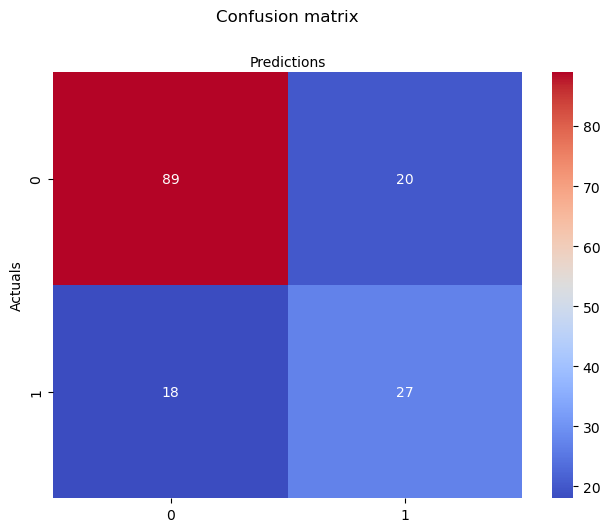

In [12]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="coolwarm" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actuals') 
plt.xlabel('Predictions') 

### Problem 2: K-fold cross-validation (K = 5,10)
#### 5-Fold Cross Validation

In [13]:
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
kfold_model = LogisticRegression(solver = 'liblinear')
kfold_model.fit(X_train, Y_train)
y_pred = kfold_model.predict(X_test)
results = cross_val_score(kfold_model, X_train, Y_train, cv=kfold)


In [14]:
c_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:", c_matrix , "\n")

class_report = classification_report(Y_test, y_pred)
print(class_report)

Confusion Matrix: [[89 20]
 [19 26]] 

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       109
         1.0       0.57      0.58      0.57        45

    accuracy                           0.75       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154



Text(0.5, 427.9555555555555, 'Predictions')

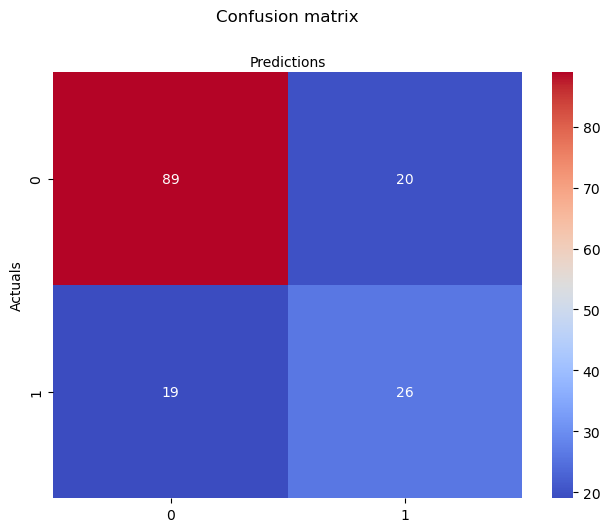

In [15]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="coolwarm" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actuals') 
plt.xlabel('Predictions') 

#### 10-Fold Cross Validation

In [16]:
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
results = cross_val_score(model, X_train, Y_train, cv=kfold)


In [17]:
c_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:", c_matrix , "\n")

class_report = classification_report(Y_test, y_pred)
print(class_report)

Confusion Matrix: [[89 20]
 [19 26]] 

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       109
         1.0       0.57      0.58      0.57        45

    accuracy                           0.75       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154



Text(0.5, 427.9555555555555, 'Predictions')

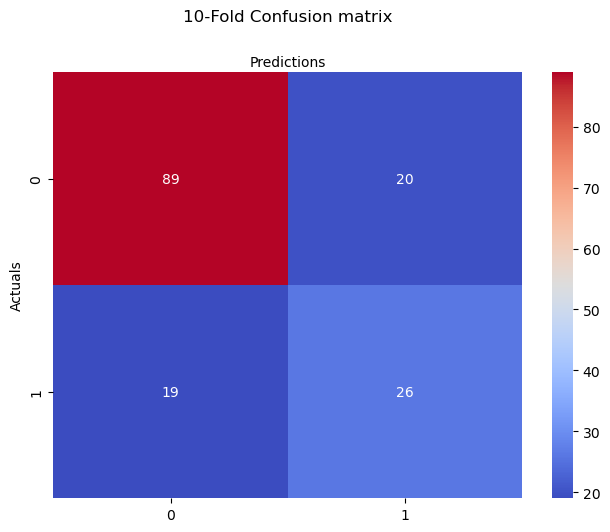

In [18]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="coolwarm" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('10-Fold Confusion matrix', y=1.1) 
plt.ylabel('Actuals') 
plt.xlabel('Predictions') 

### Problem 3: Breast Cancer Dataset

In [19]:
cancer = load_breast_cancer()
cancer_data = cancer.data

cancer_df = pd.DataFrame(cancer_data)
cancer_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
labels = np.reshape(cancer.target, (569,1))

In [21]:
cancer_data = np.concatenate([cancer_data,labels], axis = 1)
cancer_data.shape

(569, 31)

In [22]:
cancer_df = pd.DataFrame(cancer_data)

In [23]:
features = cancer.feature_names
print(len(features))
feature_names = np.append(features, 'label')

cancer_df.columns = feature_names

30


In [24]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [25]:
category_Y = ['label']
categories_X = cancer_df.columns[:30]

scaler = MinMaxScaler()

In [26]:
df_train, df_test = train_test_split(cancer_df, train_size = 0.8, test_size = 0.2)

In [27]:
X_train, Y_train, X_test, Y_test = feature_scale(df_train, df_test, categories_X, category_Y, scaler)

In [28]:
X_train

array([[1.        , 0.45761749, 0.46948357, ..., 0.71993127, 0.40370589,
        0.26629936],
       [1.        , 0.15518955, 0.0785318 , ..., 0.23010309, 0.27045141,
        0.14548078],
       [1.        , 0.16607506, 0.35125907, ..., 0.2243299 , 0.12773507,
        0.1533517 ],
       ...,
       [1.        , 0.08978182, 0.21809646, ..., 0.16364261, 0.17129903,
        0.12639381],
       [1.        , 0.29906763, 0.47759283, ..., 0.19292096, 0.2113148 ,
        0.07569198],
       [1.        , 0.34260968, 0.74562527, ..., 0.28243986, 0.06406466,
        0.15033451]])

In [29]:
# Logistic Regression

classifier = LogisticRegression(penalty = 'none', random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(penalty='none', random_state=0)

In [30]:
y_pred = classifier.predict(X_test)
c_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:", c_matrix , "\n")

class_report = classification_report(Y_test, y_pred)
print(class_report)

Confusion Matrix: [[46  4]
 [ 7 57]] 

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89        50
         1.0       0.93      0.89      0.91        64

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



Text(0.5, 427.9555555555555, 'Predictions')

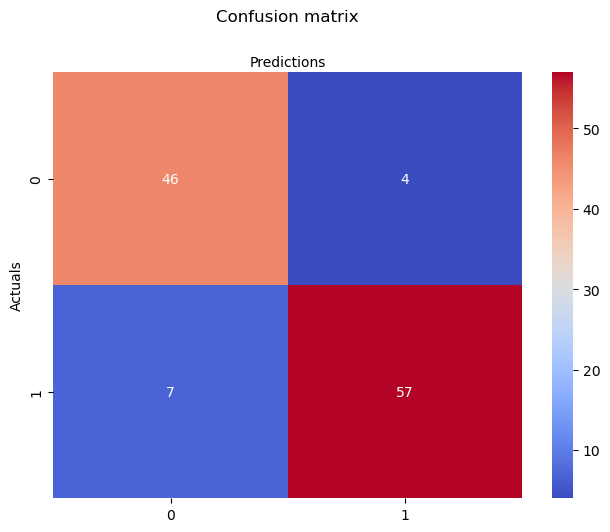

In [31]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="coolwarm", fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actuals') 
plt.xlabel('Predictions') 

#### Adding Penalties

In [32]:
# Logistic Regression
model = LogisticRegression(random_state = 0) # default is to add penalties
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [33]:
y_pred = model.predict(X_test)
c_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:", c_matrix , "\n")

class_report = classification_report(Y_test, y_pred)
print(class_report)

Confusion Matrix: [[41  9]
 [ 0 64]] 

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        50
         1.0       0.88      1.00      0.93        64

    accuracy                           0.92       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.92      0.92       114



Text(0.5, 427.9555555555555, 'Predictions')

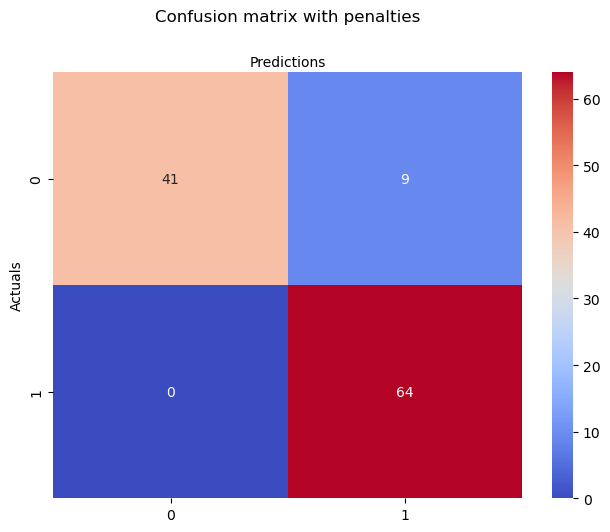

In [34]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="coolwarm" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix with penalties', y=1.1) 
plt.ylabel('Actuals') 
plt.xlabel('Predictions') 

### Problem 4: K-fold cross-validation (K = 5,10)
#### 5-Fold Cross Validation

In [35]:
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(penalty = 'none')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
results = cross_val_score(model, X_train, Y_train, cv=kfold)


In [36]:
c_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:", c_matrix , "\n")

class_report = classification_report(Y_test, y_pred)
print(class_report)

Confusion Matrix: [[46  4]
 [ 7 57]] 

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89        50
         1.0       0.93      0.89      0.91        64

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



Text(0.5, 427.9555555555555, 'Predictions')

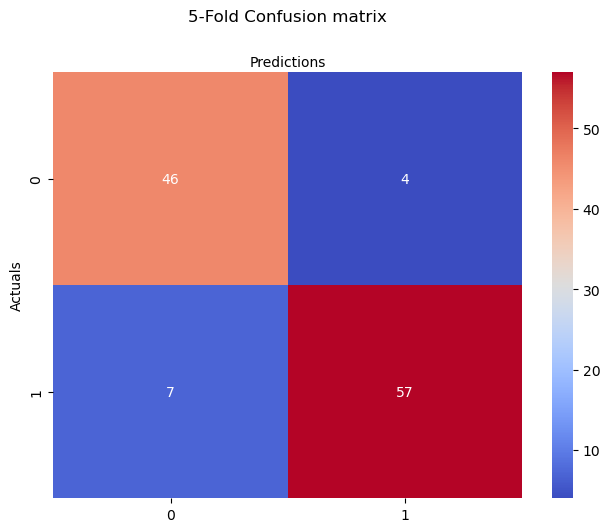

In [37]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="coolwarm" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('5-Fold Confusion matrix', y=1.1) 
plt.ylabel('Actuals') 
plt.xlabel('Predictions') 

In [38]:
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
results = cross_val_score(model, X_train, Y_train, cv=kfold)


In [39]:
c_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:", c_matrix , "\n")

class_report = classification_report(Y_test, y_pred)
print(class_report)

Confusion Matrix: [[42  8]
 [ 0 64]] 

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        50
         1.0       0.89      1.00      0.94        64

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



Text(0.5, 427.9555555555555, 'Predictions')

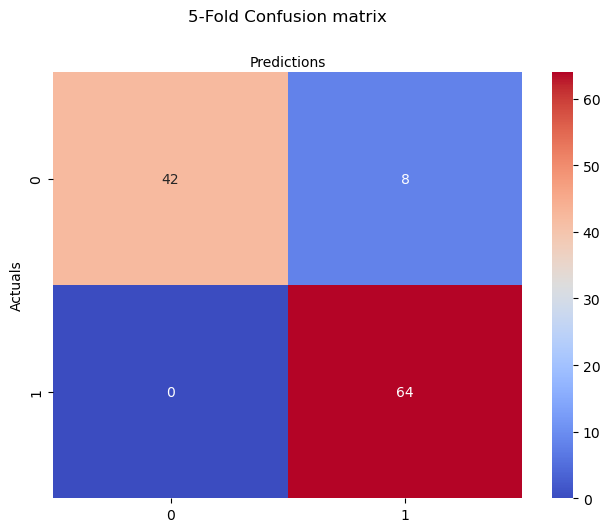

In [40]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="coolwarm" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('5-Fold Confusion matrix', y=1.1) 
plt.ylabel('Actuals') 
plt.xlabel('Predictions') 

#### 10-Fold Cross Validation

In [41]:
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(penalty = 'none')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
results = cross_val_score(model, X_train, Y_train, cv=kfold)

In [42]:
c_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:", c_matrix , "\n")

class_report = classification_report(Y_test, y_pred)
print(class_report)

Confusion Matrix: [[46  4]
 [ 7 57]] 

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89        50
         1.0       0.93      0.89      0.91        64

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



Text(0.5, 427.9555555555555, 'Predictions')

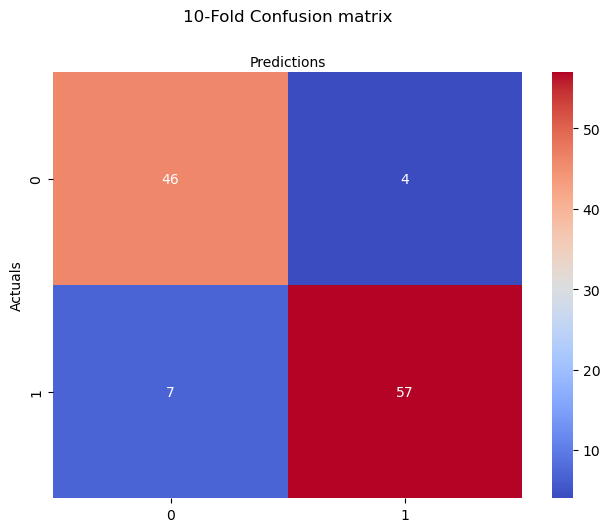

In [43]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="coolwarm" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('10-Fold Confusion matrix', y=1.1) 
plt.ylabel('Actuals') 
plt.xlabel('Predictions')

In [44]:
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
results = cross_val_score(model, X_train, Y_train, cv=kfold)

In [45]:
c_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:", c_matrix , "\n")

class_report = classification_report(Y_test, y_pred)
print(class_report)

Confusion Matrix: [[42  8]
 [ 0 64]] 

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        50
         1.0       0.89      1.00      0.94        64

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



Text(0.5, 427.9555555555555, 'Predictions')

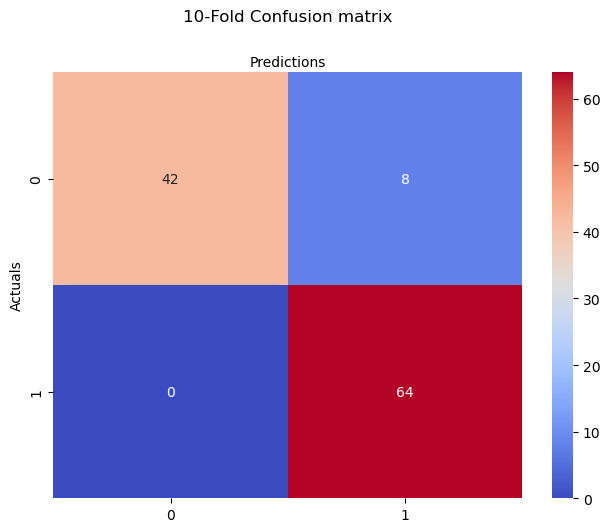

In [46]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="coolwarm" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('10-Fold Confusion matrix', y=1.1) 
plt.ylabel('Actuals') 
plt.xlabel('Predictions')